<a href="https://colab.research.google.com/github/bluebluer/hello-wolrd/blob/master/networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import networkx as nx
G = nx.Graph()

In [63]:
#Nodes
G.add_node(1)
G.add_nodes_from([2,3])
G

In [64]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

In [65]:
H = nx.path_graph(10) # 十个节点 类似于链表
G.add_nodes_from(H)

In [66]:
#Edges
G.add_edge(1,2)
e = (2,3)
G.add_edge(*e) # unpack edge tuple*
G.add_edges_from([(1,2),(1,3)])
G.add_edges_from(H.edges)

In [67]:
G.number_of_nodes()

10

In [68]:
G.number_of_edges()

10

In [69]:
G.clear()
G.number_of_nodes()

0

In [70]:
G.add_edges_from([(1,2),(1,3)])
G.number_of_nodes()

3

In [71]:
G.add_node(1)
G.add_edge(1,2)
G.add_node('spam')
G.add_nodes_from('spam') # 加入四个节点 s p a m
G.add_edge(3,'m')

In [72]:
G.number_of_nodes()

8

In [73]:
G.number_of_edges()

3

In [74]:
list(G)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [75]:
# 有向边
DG = nx.DiGraph()
DG.add_edge(2,1) # 按照2，1顺序 添加节点
DG.add_edge(1,3)
DG.add_edge(2,4)
DG.add_edge(1,2)
list(DG)

[2, 1, 3, 4]

In [76]:
assert list(DG.successors(2)) == [1,4]

In [77]:
assert list(DG.edges) == [(2,1),(2,4),(1,3),(1,2)]

In [78]:
# G.nodes,G.edges,G.adj,G.degree
print(list(G.nodes))
print(list(G.edges))
print(list(G.adj[1]))
G.degree[1]

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']
[(1, 2), (1, 3), (3, 'm')]
[2, 3]


2

In [79]:
G.edges([2,'m'])

EdgeDataView([(2, 1), ('m', 3)])

In [80]:
G.degree([2,3])

DegreeView({2: 1, 3: 2})

In [81]:
# Removing elements from a graph 
# G.remove_node(2)
G.remove_nodes_from('spam')
list(G.nodes)


[1, 2, 3, 'spam']

In [82]:
print(list(G.edges))
G.remove_edge(1,3)
list(G.edges)

[(1, 2), (1, 3)]


[(1, 2)]

In [83]:
list(H.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [84]:
list(H.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]

In [85]:
G.add_edge(1,2)
list(G.edges)

[(1, 2)]

In [86]:
H=nx.DiGraph(G)
list(H.edges())

[(1, 2), (2, 1)]

In [87]:
edgelist = [(0,1),(1,2),(2,3)]
H=nx.Graph(edgelist) # create a graph from an edge list
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [88]:
adjacency_dict = {0:(1,2),1:(0,2),2:(0,1)}
H=nx.Graph(adjacency_dict)
list(H.edges())


[(0, 1), (0, 2), (1, 2)]

In [89]:
# how to use nodes and edges
G = nx.Graph([(1,2,{"color":"yellow"})])
G[1] # 类似于G.adj[1]的操作

AtlasView({2: {'color': 'yellow'}})

In [90]:
list(G.nodes)

[1, 2]

In [91]:
list(G.edges)

[(1, 2)]

In [92]:
G[1][2]

{'color': 'yellow'}

In [93]:
G.add_edge(1,3)
G[1][3]['color']='blue'
G.edges[1,2]['color']='red'
G.edges[1,2]

{'color': 'red'}

In [95]:
# G.adjacency() ,G.adj.items()
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
list(FG.edges)

[(1, 2), (1, 3), (2, 4), (3, 4)]

In [96]:
for n,nbrs in FG.adj.items():
  for nbr,eattr in nbrs.items():
    wt = eattr['weight']
    if wt<0.5:print(f"({n},{nbr},{wt:.3})")

(1,2,0.125)
(2,1,0.125)
(3,4,0.375)
(4,3,0.375)


In [97]:
for(u,v,wt) in FG.edges.data('weight'):
  if wt<0.5:
    print(f"({u},{v},{wt:.3})")

(1,2,0.125)
(3,4,0.375)


In [98]:
# Adding attributes to graphs, nodes, and edges
G = nx.Graph(day='Friday')
G.graph

{'day': 'Friday'}

In [99]:
G.graph['day'] = 'Monday'
G.graph

{'day': 'Monday'}

In [100]:
G.add_node(1,time='5pm')
G.add_nodes_from([3],time='2pm')
G.nodes[1]

{'time': '5pm'}

In [101]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

In [102]:
G.add_edge(1,2,weight=4.7)
G.add_edges_from([(3,4),(4,5)],color='red')
G.add_edges_from([(1,2,{'color':'blue'}),(2,3,{'weight':8})])
G[1][2]['weight']=4.7
G.edges[3,4]['weight']=4.2


In [103]:
# Directed graphs
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5),(3,1,0.75)])
DG.out_degree(1,weight='weight')

0.5

In [104]:
DG.degree(1,weight='weight')

1.25

In [106]:
#neighbors is equivalent to successors 
print(list(DG.successors(1)))
print(list(DG.neighbors(1)))

[2]
[2]


In [107]:
list(DG.neighbors(3))

[1]

In [108]:
# Drawing graphs
import matplotlib.pyplot as plt

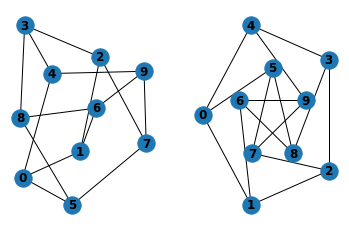

In [109]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G,with_labels=True,font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')